# Linear Regression with One Variable in Python from Scratch

## Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the dataset

In [2]:
data = pd.read_csv('linear_regression.csv')
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


## Split the dataset into X (Features) and y (Target)

In [3]:
x = data.iloc[:, -2].values
y = data.iloc[:, -1].values

## Feature Scaling

<style>
td {
  font-size: 200px
}
</style>
Feature scaling is a method used to normalize the range of independent variables or features of data.

In [4]:
s = np.std(x)    
m = np.mean(x)
def feature_scaling(variable):
    global m
    global s
    lst = []
    for i in variable:
        fs_x = (i - m) / s
        lst.append(fs_x)
    variable = np.array(lst)
    
    return variable

In [5]:
X = feature_scaling(x)

## Cost function of linear regression

Cost function(J) of Linear Regression is the Root Mean Squared Error (RMSE) between predicted y value (pred) and true y value (y).
![alt text](https://i.stack.imgur.com/O752N.png "1_1")

In [2]:
def cost(X, y, t0, t1):
    cost = 0
    m = float(len(X))
    
    for i in range(len(X)):
        cost += ((t0 + t1 * X[i]) - y[i]) ** 2
    
    return cost / (2 * m)

### Goal

Our main goal, is to reduce the cost as much as possible (minimize J(theta0, theta1)).

In order to minimize the cost, GRADIENT DESCENT method is used.
![alt text](https://miro.medium.com/max/900/1*G3evFxIAlDchOx5Wl7bV5g.png "1_2")

## Gradient Descent
Gradient descent is an optimization algorithm used to minimize some function(here cost function) by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.
![alt text](https://miro.medium.com/max/1200/1*laN3aseisIU3T9QTIlob4Q.gif "1_3")

In [7]:
def gradient_update(X, y, t0_current, t1_current, alpha):
    t0_gradient = 0  #Initialising d/d(t0) to 0
    t1_gradient = 0  #Initialising d/d(t1) to 0
    m = float(len(X))  
    
    for i in range(len(X)):
        t0_gradient += 1/m * ((t0_current + t1_current * X[i]) - y[i])
        t1_gradient += 1/m * ((t0_current + t1_current * X[i]) - y[i]) * X[i]
        
    new_t0 = t0_current - alpha * t0_gradient  #Updating for t0
    new_t1 = t1_current - alpha * t1_gradient  #Updating for t1
    
    return new_t0, new_t1
    
def gradient_descent(X, y, t0, t1, n_iter, alpha):
       
    for i in range(n_iter):
        t0, t1 = gradient_update(X, y, t0, t1, alpha)  #Updating t0 and t1 iteratively.
    
    return t0, t1

## Running the Gradient Descent iteratively to get optimal t0 and t1 with minimized cost

t0 -> theta 0<br>
t1 -> theta 1<br>
n_iter -> Number of iteration to run gradient descent (minimum 1000)<br>
alpha -> Learning rate (generally 0.01, 0.1, 0.05)<br>

In [8]:
t0 = 0  #Initialising t0 as 0
t1 = 0  #Initialising t1 as 0

n_iter = 2000  #Number of iteration (minimum 1000)
alpha = 0.01  #Learning Rate (generally 0.01, 0.1, 0.05)

print('Before running gradient descent \ntheta_0 = {0}, \ntheta_1 = {1}, \nCost = {2}'.format(t0, t1, cost(X, y, t0, t1)))
print('\nRunning...')

t0, t1 = gradient_descent(X, y, t0, t1, n_iter, alpha)  #Running Gradient Descent

print('\nAfter running gradient descent \ntheta_0 = {0}, \ntheta_1 = {1}, \nCost = {2}'.format(t0, t1, cost(X, y, t0, t1)))

Before running gradient descent 
theta_0 = 0, 
theta_1 = 0, 
Cost = 1732.1455435695395

Running...

After running gradient descent 
theta_0 = 51.20505100284292, 
theta_1 = 28.86467630505649, 
Cost = 4.582143930307139


### Model is ready for prediction-------------------------------------------------------------------!!!

## Plotting the regression line (best-fit line)

Text(0.5, 1.0, 'X vs y')

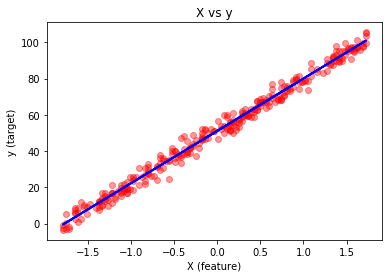

In [9]:
plt.scatter(X, y, color = 'r', alpha = 0.4)
plt.plot(X, t0 + t1 * X, color = 'b', linewidth = 2)
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.title('X vs y')

## Prediction

In [10]:
def predict(pred):
    pred = feature_scaling([pred])
    
    return t0 + t1 * pred

In [11]:
predict([70, 100, 82, 64.5, 92.38768])  #You can pass list, array, single int or float

array([[ 70.54166395, 100.97172455,  82.71368819,  64.96281951,
         93.25027925]])

# Thank you !!!.....................................................................